In [1]:
import src.models.question5 as q5

%load_ext autoreload
%autoreload 2

In [2]:
q5.get_data()

,Unnamed: 0,title,text,rating,date,imdb_id,text_compound,ceremony_date,oscar_year,winner,nomination_date
0,0,Hype,This movie does not live up to the hype. It's ...,6.0,1998-07-29,tt0116282,-0.3153,1997-03-24,1997,False,1997-02-11
1,1,Great,"Clearly the best film of 1996 ""Fargo"" is a bea...",10.0,1998-07-30,tt0116282,0.9815,1997-03-24,1997,False,1997-02-11
2,2,I could watch it every day,"I really mean that, too, and I will admit it h...",10.0,1998-07-31,tt0116282,0.9555,1997-03-24,1997,False,1997-02-11
3,3,The Coen Brothers come up with another winner.,"With no major stars or well-known names, the a...",9.0,1998-08-05,tt0116282,0.7258,1997-03-24,1997,False,1997-02-11
4,4,The best film of 1996.,This was undoubtedly the best film of 1996. T...,NaN,1998-08-08,tt0116282,0.7964,1997-03-24,1997,False,1997-02-11
...,...,...,...,...,...,...,...,...,...,...,...
40145,40145,Southern Trip Adviser,"Traveling to Louisiana, and I don't mean N'Awl...",6.0,2014-04-15,tt2125435,0.8607,2013-02-24,2013,False,2013-01-10
40146,40146,Not sure what to make of this.,Maybe I'm not as immersed in the film industry...,NaN,2014-05-10,tt2125435,0.9312,2013-02-24,2013,False,2013-01-10
40147,40147,Surreal magical realism,Beasts of the Southern Wild is one of those mo...,5.0,2014-05-17,tt2125435,0.9930,2013-02-24,2013,False,2013-01-10
40148,40148,An Unconventional Story of Love,"""Beasts of the Southern Wild"" is a film about ...",8.0,2014-11-17,tt2125435,0.8638,2013-02-24,2013,False,2013-01-10


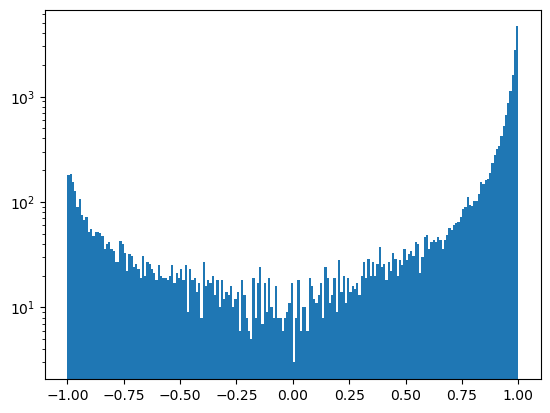

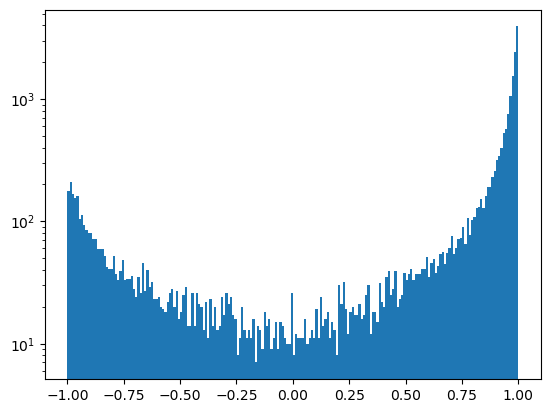

There are 12 rejected movies (p-value < 0.05). That represents only 18.181818181818183 percent of the movies


In [4]:
result_df_nomination = q5.perform_statistical_test_compound(type_="nomination")

In [5]:
result_df_nomination

,Movie ID,Winner,p-value
0,tt0120689,False,0.075963
1,tt0120737,False,0.099379
2,tt0120815,False,0.171685
3,tt0120863,False,0.278548
4,tt0124315,False,0.092361
...,...,...,...
61,tt1504320,True,0.095757
62,tt1542344,False,0.018231
63,tt1568911,False,0.308226
64,tt1655442,True,0.194887


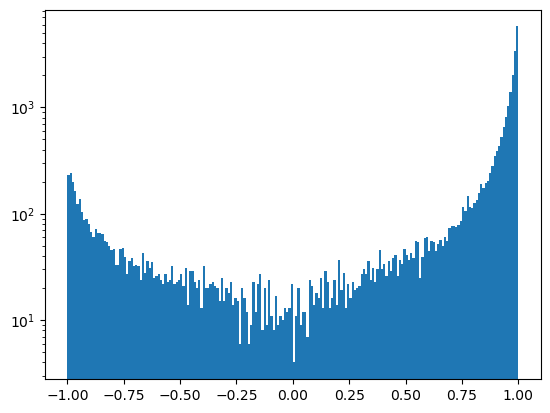

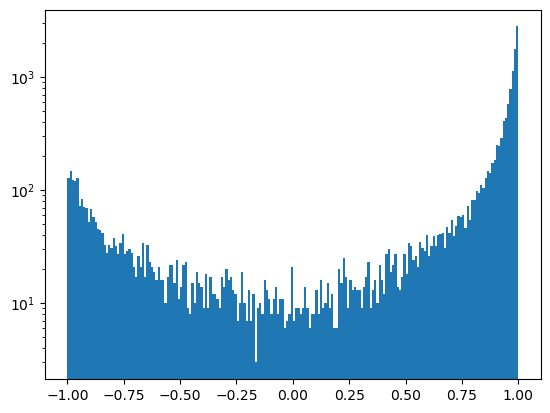

There are 20 rejected movies (p-value < 0.05). That represents only 30.303030303030305 percent of the movies


In [6]:
result_df_ceremony = q5.perform_statistical_test_compound(type_="ceremony")

In [7]:
# 4 / 9 =  44.44%
result_df_ceremony.loc[result_df_ceremony['Winner'] == True]

,Movie ID,Winner,p-value
9,tt0172495,True,0.204171
15,tt0268978,True,0.206352
27,tt0405159,True,0.241360
28,tt0407887,True,0.027680
37,tt0477348,True,0.351262
47,tt1010048,True,0.004471
50,tt1024648,True,0.038036
61,tt1504320,True,0.028927
64,tt1655442,True,0.971828


In [8]:
# 16 / 66 = 24.24%
result_df_ceremony.loc[(result_df_ceremony['Winner'] == False) & (result_df_ceremony['p-value'] < 0.05)]

,Movie ID,Winner,p-value
0,tt0120689,False,4.748418e-02
1,tt0120737,False,7.671991e-03
6,tt0140352,False,2.168102e-02
10,tt0190332,False,1.905200e-09
19,tt0311113,False,6.403260e-03
24,tt0361748,False,1.248491e-03
25,tt0375063,False,1.675194e-02
26,tt0388795,False,1.913627e-03
32,tt0449059,False,1.536039e-02
35,tt0467406,False,3.328548e-04


Movies that win oscar seem to create a change in the average sentiment score more often

Linear regression for avant/après nomination + p-value

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     34.55
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.19e-09
Time:                        17:53:43   Log-Likelihood:                 9626.6
No. Observations:               32340   AIC:                        -1.925e+04
Df Residuals:                   32338   BIC:                        -1.923e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9011      0.001    637.685      0.0

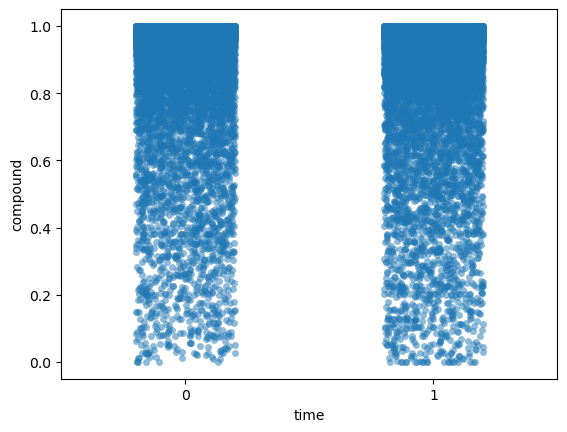

In [9]:
final_df_positive = q5.perform_regression_compound(type_score="positive", type_date="nomination")

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2520
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.616
Time:                        17:53:44   Log-Likelihood:                -811.48
No. Observations:                6036   AIC:                             1627.
Df Residuals:                    6034   BIC:                             1640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7129      0.005   -141.462      0.0

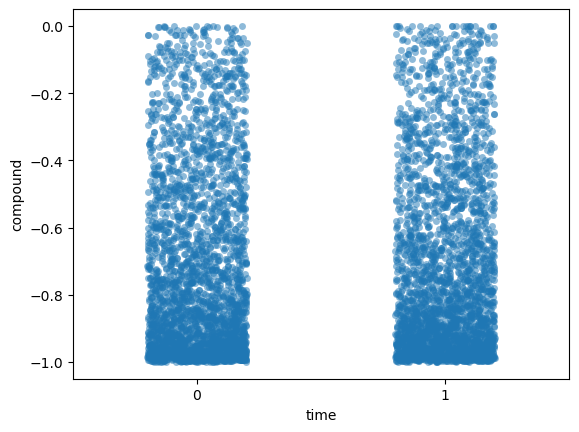

In [10]:
final_df_negative = q5.perform_regression_compound(type_score="negative", type_date="nomination")

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.52e-25
Time:                        17:53:46   Log-Likelihood:                -37852.
No. Observations:               39554   AIC:                         7.571e+04
Df Residuals:                   39552   BIC:                         7.573e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6613      0.004    147.593      0.0

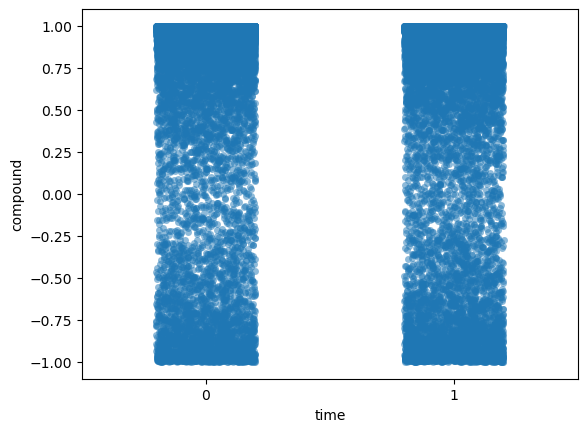

In [11]:
final_df = q5.perform_regression_compound(type_date="nomination")

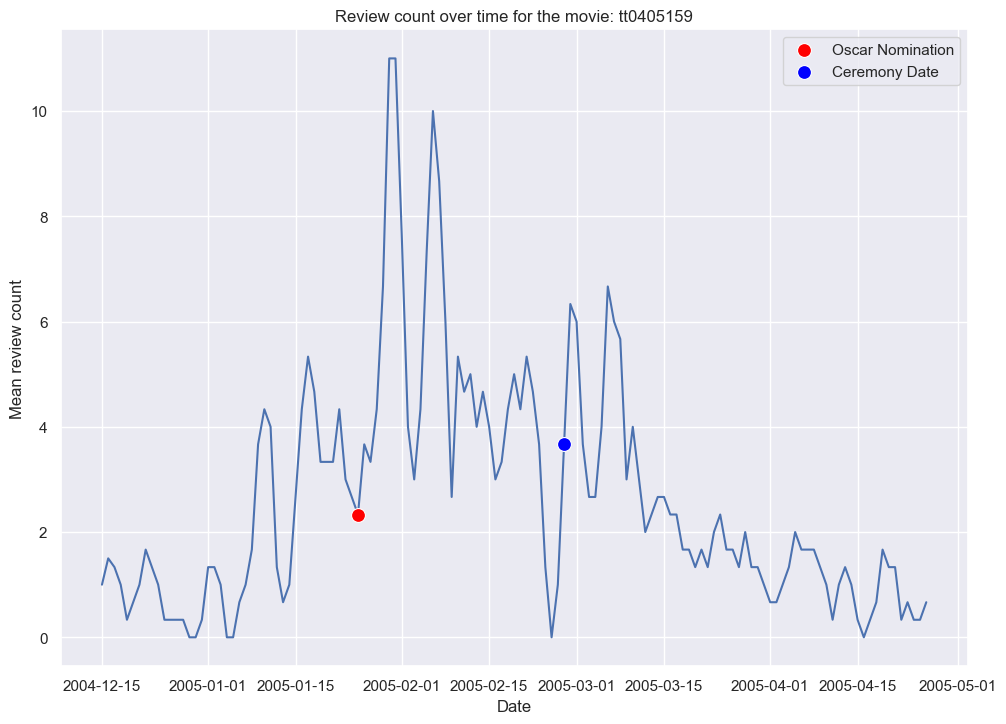

In [12]:
q5.plot_oscar_bump_unique_movie('tt0405159',"count")

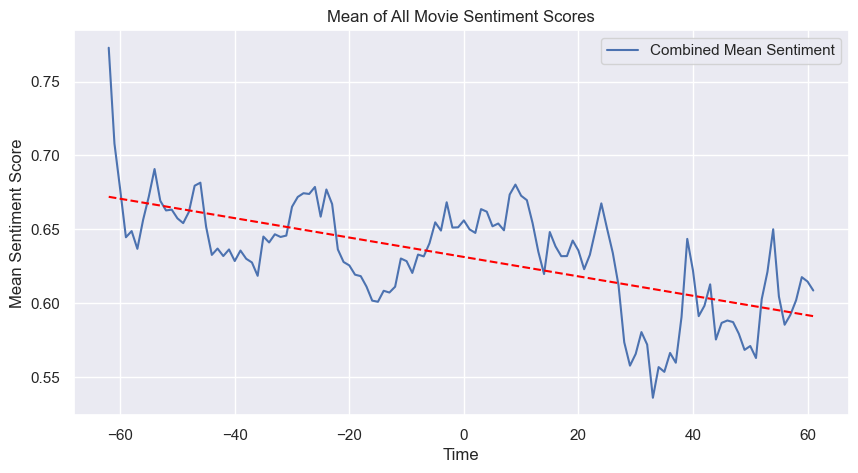

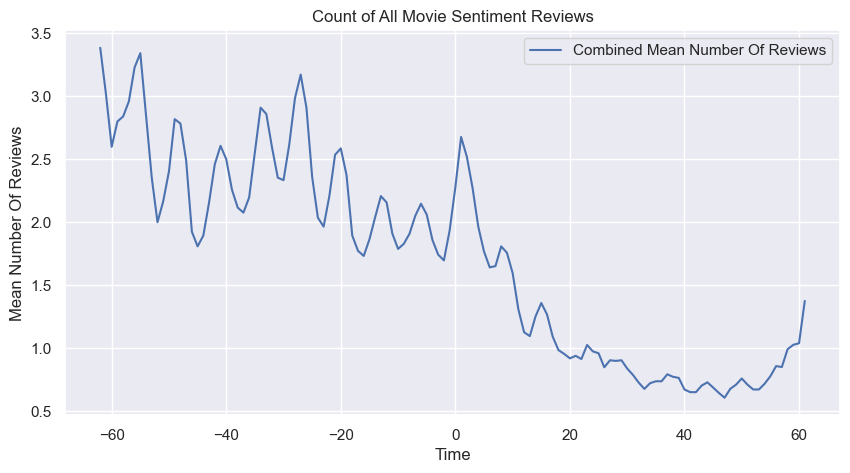

In [13]:
q5.plot_oscar_bump_all_movies()

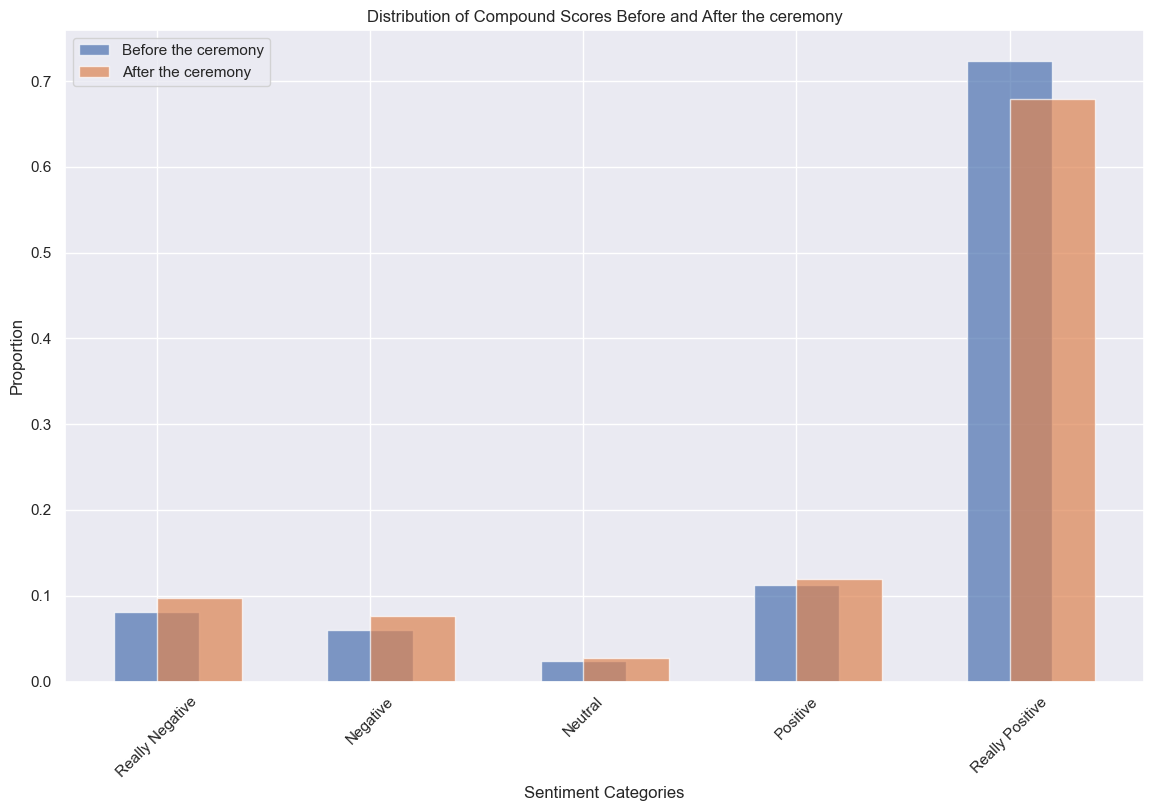

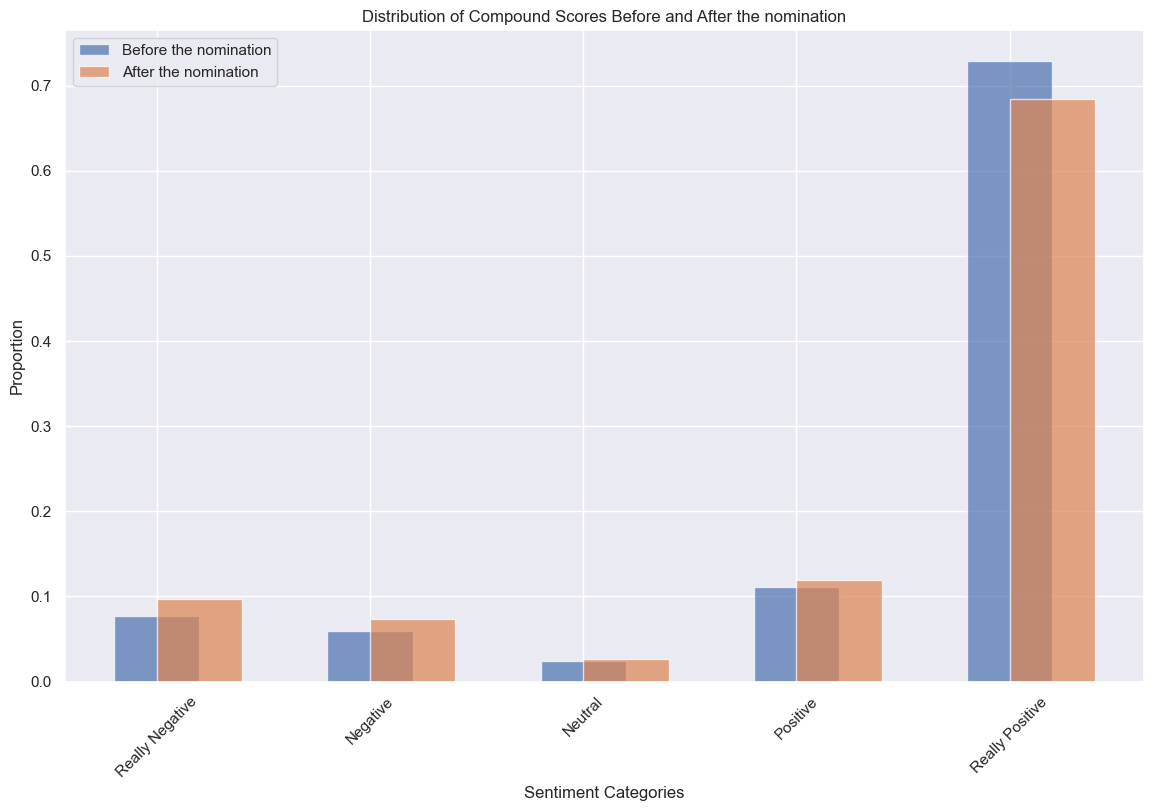

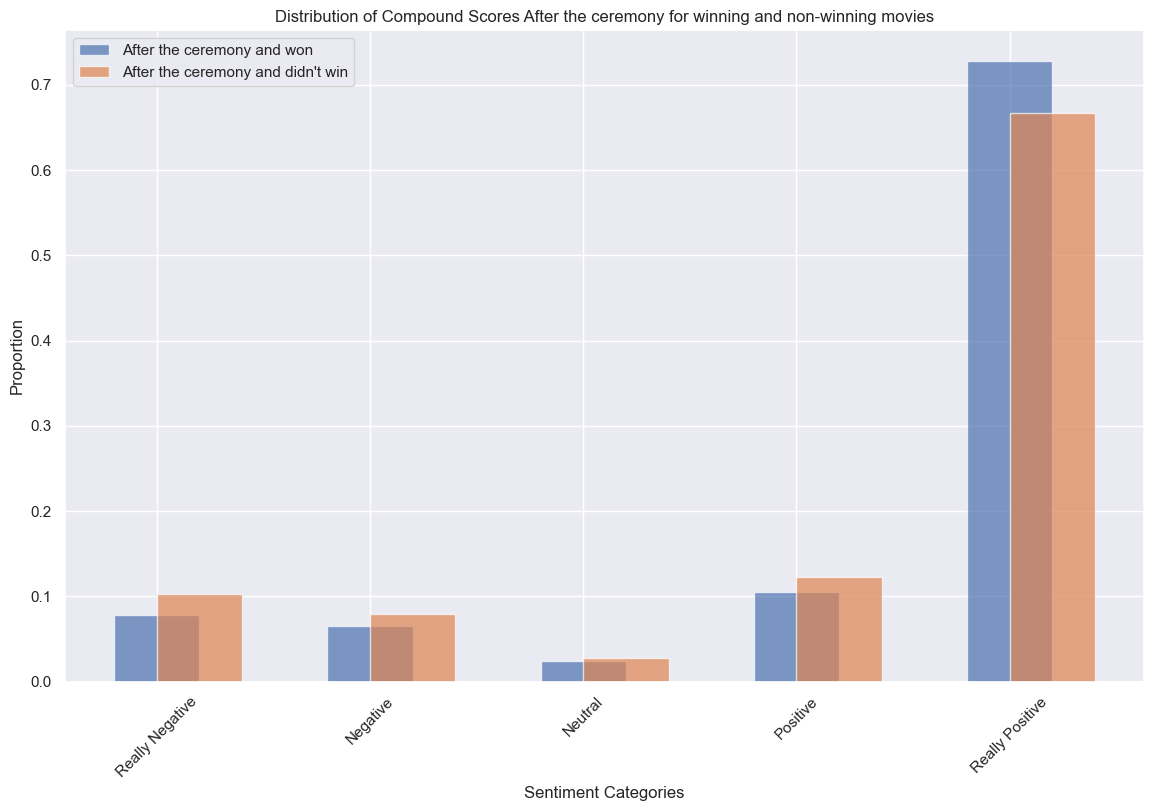

In [14]:
q5.plot_proportions()